<a href="https://colab.research.google.com/github/vanoha/Machine-Learning/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !wget https://raw.githubusercontent.com/girafe-ai/ml-course/master/week0_03_linear_classification/notmnist.py

In [ ]:
import numpy as np
import torch

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(16).reshape(4,4)

print(x)
print((x.shape,))
print(x + 5)
print(np.dot(x, x.T))
print(x.mean())

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
((4, 4),)
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]
7.5


In [ ]:
torch.transpose?

In [ ]:
x = np.arange(16).reshape(4,4)

x = torch.tensor(x, dtype=torch.float32)

print(x)
print(x.shape)
print(x + 5)
print(x.transpose(1,0))
print(torch.matmul(x, x.transpose(1, 0)))
print(torch.mean(x, dim=-1))
print(torch.cumsum(x, dim=0))

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
torch.Size([4, 4])
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
tensor([[ 0.,  4.,  8., 12.],
        [ 1.,  5.,  9., 13.],
        [ 2.,  6., 10., 14.],
        [ 3.,  7., 11., 15.]])
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


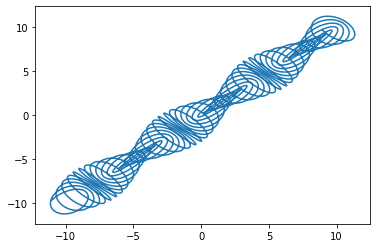

In [ ]:
t = torch.linspace(-10, 10, steps = 10000)

x = t - 1.5 * torch.cos(15 * t)
y = t - 1.5 * torch.sin(16 * t)

plt.plot(x.numpy(), y.numpy())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

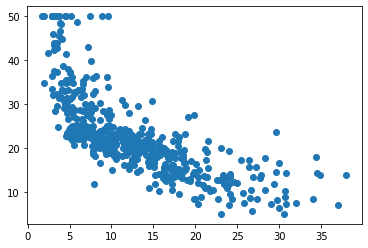

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

In [ ]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [ ]:
y_pred = w * x + b
loss = torch.mean( (y_pred - y)**2 )

loss.backward()

In [ ]:
print(w.grad)
print(b.grad)

tensor([-47.3514])
tensor([-45.0656])


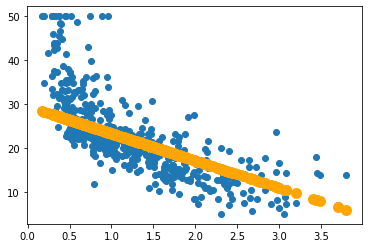

loss =  44.815567


In [ ]:
from IPython.display import clear_output

w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

for i in range(100):

  y_pred = w * x + b
  loss = torch.mean( (y_pred - y)**2 )
  loss.backward() # вычисляем градиент лосса

  w.data -= 0.05 * w.grad.data
  b.data -= 0.05 * b.grad.data

  # обнуляем градиенты, так как на этом шаге мы уже обновили веса и эти градиенты больше не нужны
  w.grad.data.zero_()
  b.grad.data.zero_()

  if (i + 1) % 5 == 0:
    clear_output(True)
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
    plt.show()

    print('loss = ', loss.data.numpy())
    if loss.data.numpy() < 0.5:
      print("Done!")
      break;x

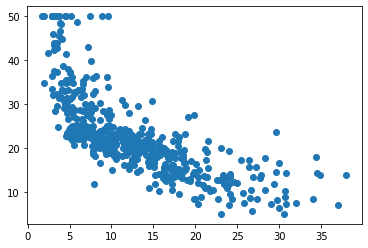

loss =  nan


In [ ]:
x = torch.tensor(boston.data[:, -1], dtype=torch.float32)

w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

grad_history = []

for i in range(100):

  y_pred = w * x + b
  loss = torch.mean( (y_pred - y) ** 2 )
  loss.backward()
  grad_history.append( (w.grad.item(), b.grad.item()) )

  w.data -= 0.05 * w.grad.data
  b.data -= 0.05 * b.grad.data

  w.grad.data.zero_()
  b.grad.data.zero_()

  if (i + 1) % 5 == 0:
    clear_output(True)
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='orange', linewidth=5)
    plt.show()

    print("loss = ", loss.data.numpy())
    if loss.data.numpy() < 0.5:
        print("Done!")
        break

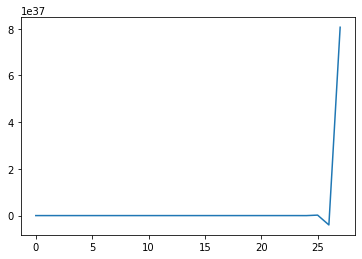

In [ ]:
plt.plot([element[0] for element in grad_history], )

Как мы видим, градиент взорвался. Допускать такого мы не должны. Избежать такого можно путем уменьшения *learning rate* или использованием *gradient clipping*

# High-level torch

Если раньше мы многое делали вручную: градиентные шаги, высчитывание loss функции и т.д. То сейчас научимся использовать pytorch для этих целей.

In [ ]:
from notmnist import load_notmnist
X_train, y_train, X_test, y_test = load_notmnist(letters='AE')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])

print(len(X_train), len(X_test))

Parsing...
found broken img: ./notMNIST_small/A/RGVtb2NyYXRpY2FCb2xkT2xkc3R5bGUgQm9sZC50dGY=.png [it's ok if <10 images are broken]
Done
2808 937


In [ ]:
X_train.shape

(2808, 784)

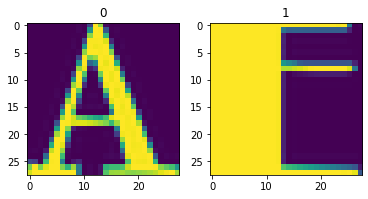

In [ ]:
for i in [0,1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_train[i].reshape([28,28]))
    plt.title(str(y_train[i]))

Теперь поработаем с аналогом pipline из sklearn. Называется он **torch.nn.Module**

In [ ]:
from torch import nn
import torch.nn.functional as F

У нас проблема бинарной классификации (2 буквы только), поэтому построим __Logistic Regression with sigmoid__.
$$P(y_i | X_i) = \sigma(W \cdot X_i + b) ={ 1 \over {1+e^{- [W \cdot X_i + b]}} }$$

In [ ]:
# создаем сеть, в которую будем складывать слои, которые потом будут
# выполняться по очереди
model = nn.Sequential()

# добавим первый слой с 784 input units и 1 output unit
model.add_module('l1', nn.Linear(784, 1))

# добавим softmax activation for probabilities.
# слои должны иметь УНИКАЛЬНОЕ имя
model.add_module('l2', nn.Sigmoid())

In [ ]:
# выводим размеры параметров из нашей model
print([w.shape for w in model.parameters()])

[torch.Size([1, 784]), torch.Size([1])]


In [ ]:
# создадим примерочные данные с 3 примерами и 784 features
x = torch.tensor(X_train[:3], dtype=torch.float32)
y = torch.tensor(y_train[:3], dtype=torch.float32)

y_predict = model(x)[:, 0]

# получим вероятностей отнесения к классам
y_predict

tensor([0.4537, 0.5352, 0.5583], grad_fn=<SelectBackward0>)

Теперь определим функцию потерь binary cross entropy (обычно ее берут для бинарной классификации). Она представлена в общей форме
$$ L = {1 \over N} \underset{X_i,y_i} \sum - [  y_i \cdot log P(y_i | X_i) + (1-y_i) \cdot log (1-P(y_i | X_i)) ]$$

In [ ]:
# с помощью F из pytorch мы объявим функции binary_cross_entropy, чтобы 
# не писать это все вручную
print(y_predict.shape, y.shape)
crossentropy = F.binary_cross_entropy(y_predict, y, reduction='none')

loss = torch.mean(crossentropy, dim=0, keepdims=True)
assert loss.data.numpy()[0] <= np.log(5), "Loss is too large even for untrained model. Please double-check it."

torch.Size([3]) torch.Size([3])


Когда мы обучали линейную регрессию выше, нам пришлось вручную .zero_() градиенты для обеих переменных. Представьте себе этот код для 50-слойной сети.

Для этого в pytorch есть модуль `torch.optim`

In [ ]:
# объявляем оптимизатор
opt = torch.optim.SGD(model.parameters(), lr=0.01)

# как мы его можем использовать:
loss.backward()   # вычисляет новые градиенты
opt.step()        # изменяет веса
opt.zero_grad()   # очищает градиенты

RuntimeError: ignored

In [ ]:
del x, y, y_predict, loss, y_pred

## Соединяем всё вместе

In [ ]:
model = nn.Sequential()
model.add_module('first', nn.Linear(784, 1))
model.add_module('second', nn.Sigmoid())

opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
history = []

for i in range(100):

  ix = np.random.randint(0, len(X_train), 256)
  x_batch = torch.tensor(X_train[ix], dtype=torch.float32)
  y_batch = torch.tensor(y_train[ix], dtype=torch.float32)

  y_pred = model(x_batch)[:, 0]

  loss = torch.mean(F.binary_cross_entropy(y_pred, y_batch, reduction='none'), dim=0, keepdims=True)

  loss.backward()
  
  opt.step()

  opt.zero_grad()

  history.append(loss.data.numpy())

  if i % 10 == 0:
        print("step #%i | mean loss = %.3f" % (i, np.mean(history[-10:])))

step #0 | mean loss = 0.043
step #10 | mean loss = 0.046
step #20 | mean loss = 0.057
step #30 | mean loss = 0.056
step #40 | mean loss = 0.054
step #50 | mean loss = 0.047
step #60 | mean loss = 0.042
step #70 | mean loss = 0.041
step #80 | mean loss = 0.054
step #90 | mean loss = 0.047


Теперь посмотрим как выглядят тестовые данные

In [ ]:
x_test = torch.tensor(X_test, dtype=torch.float32)
predict_y_test = model(x_test)[:, 0]
predict_y_test = np.array(predict_y_test > 0.5)

accuracy = np.mean(predict_y_test == y_test)

print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.95, "try training longer"

print('Great job!')

Test accuracy: 0.97118
Great job!
